<a href="https://colab.research.google.com/github/israfelsr/ML_Book_Practice/blob/master/Chapter_1_Fundaments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set UP

In [1]:
# Common imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

import os

# To plot figures
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/My\ Drive/Projects/oreilly_machine_learning

/content/drive/My Drive/Projects/oreilly_machine_learning


## Waht is Machine Learnig
*A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E*. Tom Mitchell, 1997

## Types of Machine Learning
### Supervised/Unsupervised Learning 
The machine learning systems can be clasified depending in how much supervision get during training.
- Supervised learning: We use labels with the solution of the task
- Unsupervised learning: There is no labeled data and the systems tries to get an intuition of the data by itself.
- Semisupervised: It works as a mix of the other two. There is a small amount of labeled data and the systems cluster the information by itself.
- Reinforcement learning: the active (*system*) is training with rewards and punishments. The active tries to learn a strategy that is call *policy* of actions. 



## Linear Regression problem

In [0]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
    oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')
    gdp_per_capita.rename(columns={'2015':'GDP per capita'}, inplace=True)
    gdp_per_capita.set_index('Country', inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by='GDP per capita', inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

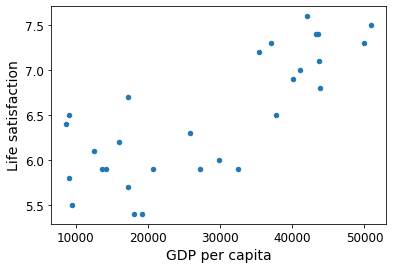

[[5.97872174]]
[[6.]]


In [4]:
#Load the data
oecd_bli = pd.read_csv('dataset/BLI_05112019191332595.csv', thousands=',')
gdp_per_capita = pd.read_csv('dataset/WEO_Data.csv', thousands=',', delimiter=';', encoding='latin1', na_values='n/a')

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

# Visualize the data
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

# Linear reg model and K-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
model = sklearn.linear_model.LinearRegression()
clf = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)
clf.fit(X,y)

# Prediction
X_new = [[15346]] # Prediction for Chile GDP
print(model.predict(X_new))
print(clf.predict(X_new))

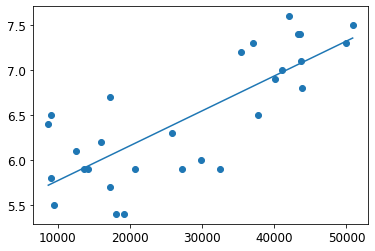

In [5]:
# Regresion visualization
plt.plot(X, model.predict(X))
plt.scatter(country_stats['GDP per capita'], country_stats['Life satisfaction'])
plt.show()